<a id="1"></a>
# <p style="background-color:#d66dac;font-family:georgia,serif;color:#FFF8ED;font-size:160%;text-align:center;border-radius:10px 10px;">Heart Disease Analysis</p>

___

<div style="text-align: center;">
  <img src="https://github.com/WillyWill143/Heart-Failure-Analysis/blob/main/Heart%20image.jpg?raw=true" alt="Heart Failure Image" width="500">
</div>

___

## <font color="#d66dac">About Heart Failure:</font>
<font color="#e6d1e5">Heart failure occurs when the heart muscle doesn't pump blood as well as it should, leading to symptoms like shortness of breath, fatigue, and fluid buildup in the lungs and other tissues. This condition can result from various factors, including coronary artery disease, high blood pressure, and diabetes.</font>

## <font color="#d66dac">About the Dataset:</font>
<font color="#e6d1e5">The Heart Failure Prediction Dataset comprises of 11 clinical features pertinent to heart disease events. These features include:</font>

1. <font color="#e6d1e5">Age: age of the patient [years]</font>
2. <font color="#e6d1e5">Sex: sex of the patient [M: Male, F: Female]</font>
3. <font color="#e6d1e5">ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]</font>
4. <font color="#e6d1e5">RestingBP: resting blood pressure [mm Hg]</font>
5. <font color="#e6d1e5">Cholesterol: serum cholesterol [mm/dl]</font>
6. <font color="#e6d1e5">FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]</font>
7. <font color="#e6d1e5">RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]</font>
8. <font color="#e6d1e5">MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]</font>
9. <font color="#e6d1e5">ExerciseAngina: exercise-induced angina [Y: Yes, N: No]</font>
10. <font color="#e6d1e5">Oldpeak: oldpeak = ST [Numeric value measured in depression]</font>
11. <font color="#e6d1e5">ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]</font>
## <font color="#d66dac">Objectives:</font>
* <font color="#e6d1e5">What contributes the most to causing Heart disease?</font>
* <font color="#e6d1e5">Characteristics of people with Heart Disease.</font>
* <font color="#e6d1e5">Predicting Heart Failure.</font>
___

<a id="1"></a>
# <p style="background-color:#d66dac;font-family:georgia,serif;color:#FFF8ED;font-size:120%;text-align:center;border-radius:10px 10px;">Import & Load</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
palette_1 = ["lightpink", "hotpink", "thistle", "orchid", "palecioletred"]
palette_2 = ["pink", "plum", "hotpink", "mediumvioletred", "mediumorchid"]
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression  
from sklearn.svm import SVC 
from xgboost import XGBClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

<a id="1"></a>
# <p style="background-color:#d66dac;font-family:georgia,serif;color:#FFF8ED;font-size:120%;text-align:center;border-radius:10px 10px;">Exploratory Data Analysis</p>

In [3]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

___

### <font color="#d66dac">Observations: </font>

* <font color="#e6d1e5">First we should note thet people with No Heart Disease are slightly more than people with Heart Disease in our data (508 / 410), which plays a difference in analysis.</font>
* <font color="#e6d1e5">This dataset has more Males than Females.</font>
* <font color="#e6d1e5">Regarding "RestingBp", around 50% of our patients are above the Hypertension Stage 1, one value has 200 (which means crisis), and another has 0 (which means already dead).</font>
* <font color="#e6d1e5">Regarding the "Cholestrol", first it's not clear because of it being measured by (mm/dl instead of mg/dl or mmol/dl), we have too many zeros (172), and 50% of our patients crossed the Borderline High Stage having more than 220 mg/dl, and we have many extreme values like 400, 500, 600. (considering dropping the column).</font>
* <font color="#e6d1e5">Regarding "FastingBS", around 23% of our patients are potentially diabetic or prediabetic.</font>
___

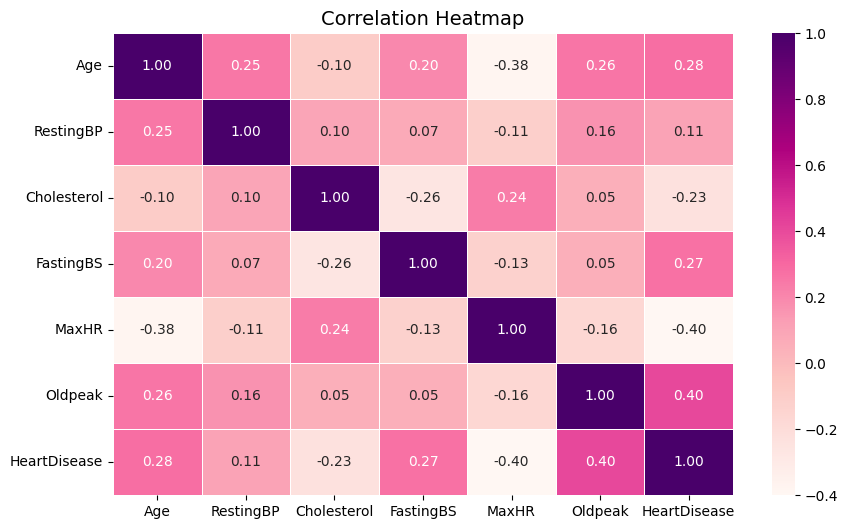

In [4]:
numeric_df = data.select_dtypes(include=['int64', 'float64'])

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="RdPu", fmt=".2f", linewidths=0.5)

# Customize the title
plt.title("Correlation Heatmap", fontsize=14)

# Show the plot
plt.show()

___
#### <font color="#e6d1e5">All Linear correlations seem reasonable except <mark style="background-color: #bb7ebd;"><b>"Cholesterol"</b></mark>, it is a weak negative correlation, which doesn't make sense due to cholesterol level increase being an important factor in causing Heart Disease.
___

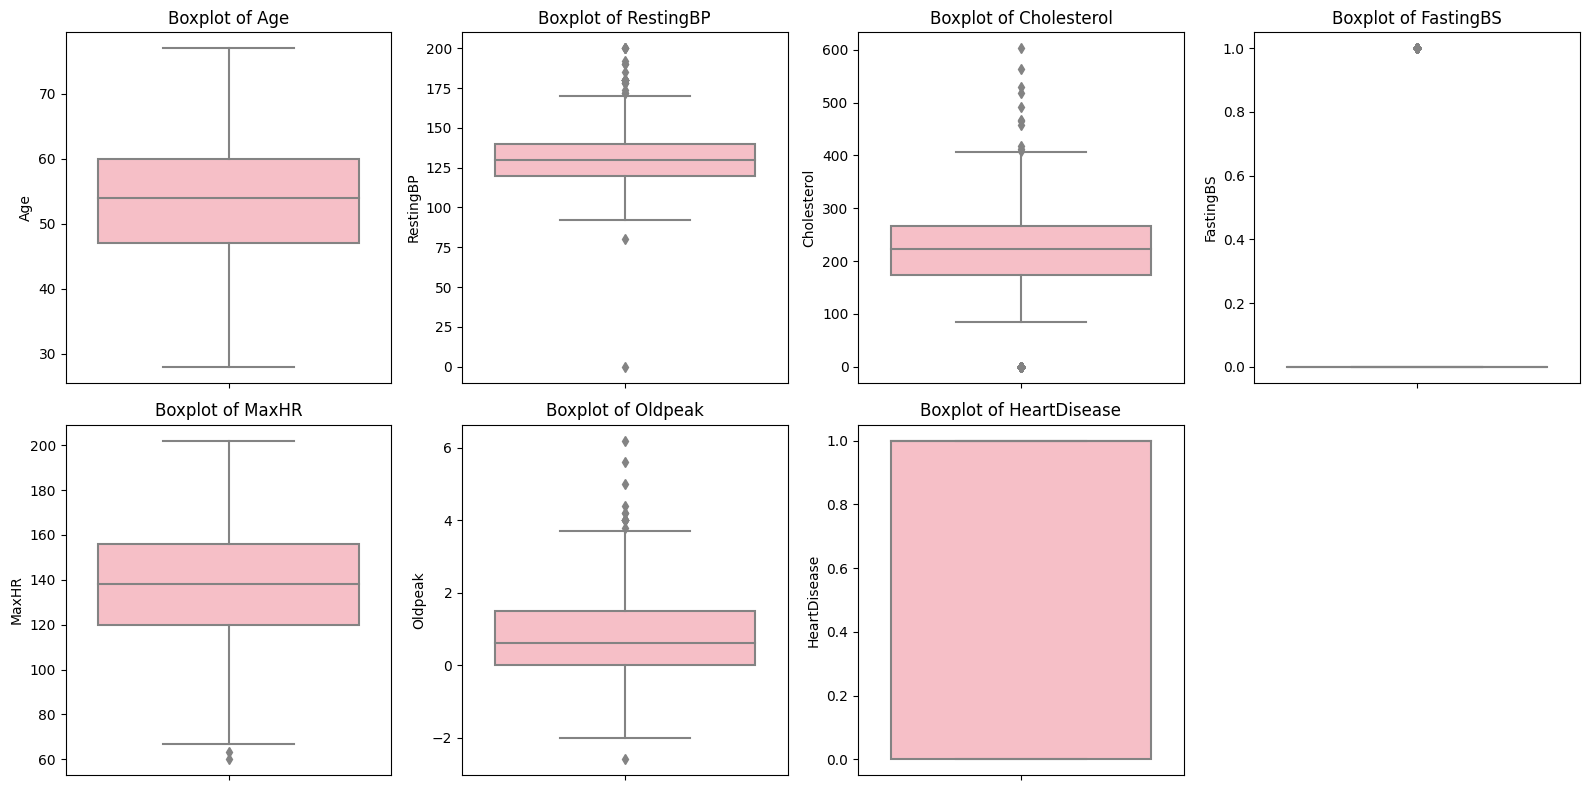

In [5]:
import math
features = data.select_dtypes(include=['int64', 'float64']).columns

n_cols = 4 
n_rows = math.ceil(len(features) / n_cols) 

plt.figure(figsize=(16, 4 * n_rows))  

for i, col in enumerate(features):    
    plt.subplot(n_rows, n_cols, i + 1)  
    sns.boxplot(y=data[col], palette = palette_1)  
    plt.title(f"Boxplot of {col}")  

plt.tight_layout()
plt.show()

___
#### <font color="#e6d1e5"><mark style="background-color: #bb7ebd;"><b>"Cholesterol"</b></mark> seems to have many abnormal outliers, <mark style="background-color: #bb7ebd;"><b>"Oldpeak"</b></mark> outliers aren't abnormal but (oldpeak > 0) suggests ischemia.</font>
___

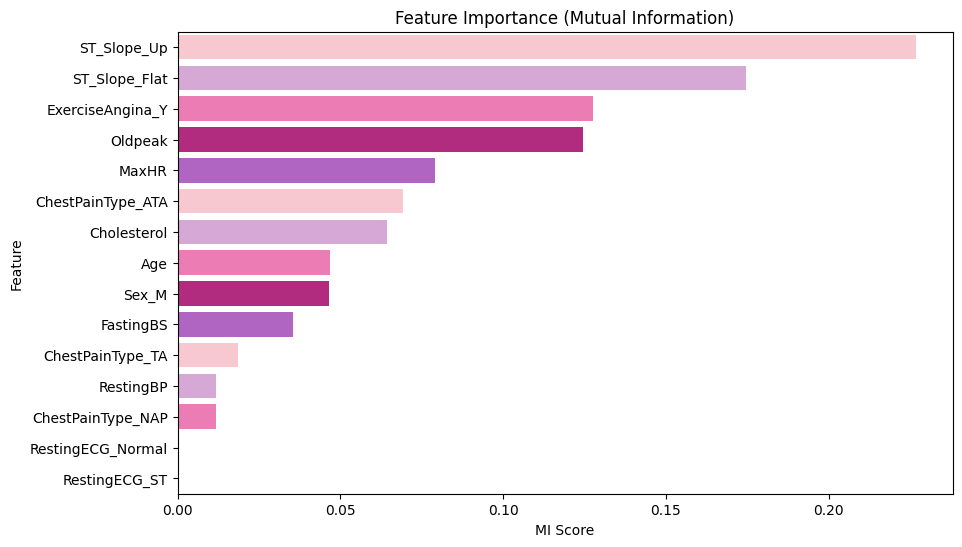

In [6]:
X = data.drop(columns=["HeartDisease"]) 
y = data["HeartDisease"]

X = pd.get_dummies(X, drop_first=True)

mi = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

mi_data = pd.DataFrame({"Feature": X.columns, "MI Score": mi})
mi_data = mi_data.sort_values(by="MI Score", ascending=False)

# Plot Mutual Information Scores
plt.figure(figsize=(10,6))
sns.barplot(x="MI Score", y="Feature", data=mi_data, palette= palette_2)
plt.title("Feature Importance (Mutual Information)")
plt.show()

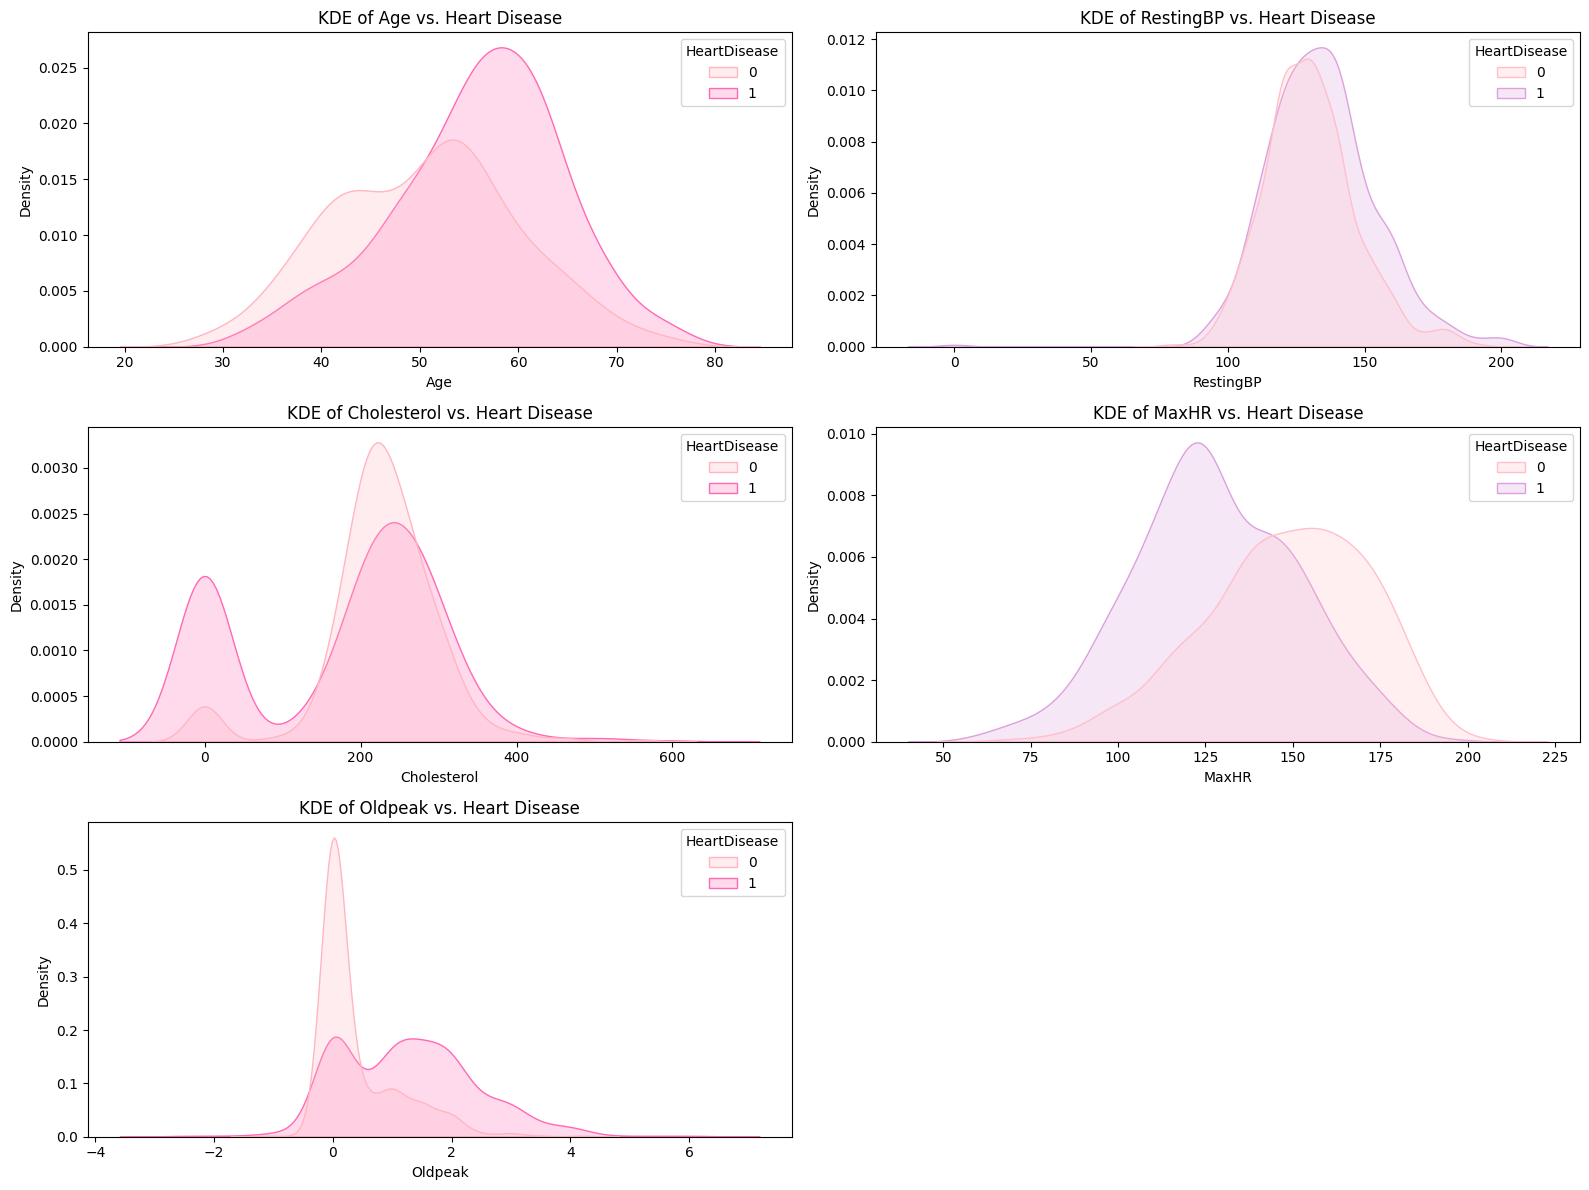

In [7]:
plt.figure(figsize=(16, 12))

# Age vs Heart Disease
plt.subplot(3, 2, 1)
sns.kdeplot(data=data, x="Age", hue="HeartDisease", fill=True, palette=palette_1)
plt.title("KDE of Age vs. Heart Disease")

# RestingBP vs Heart Disease
plt.subplot(3, 2, 2)
sns.kdeplot(data=data, x="RestingBP", hue="HeartDisease", fill=True, palette=palette_2)
plt.title("KDE of RestingBP vs. Heart Disease")

# Cholesterol vs Heart Disease
plt.subplot(3, 2, 3)
sns.kdeplot(data=data, x="Cholesterol", hue="HeartDisease", fill=True, palette=palette_1)
plt.title("KDE of Cholesterol vs. Heart Disease")

# MaxHR vs Heart Disease
plt.subplot(3, 2, 4)
sns.kdeplot(data=data, x="MaxHR", hue="HeartDisease", fill=True, palette=palette_2)
plt.title("KDE of MaxHR vs. Heart Disease")

# Oldpeak vs Heart Disease
plt.subplot(3, 2, 5)
sns.kdeplot(data=data, x="Oldpeak", hue="HeartDisease", fill=True, palette=palette_1)
plt.title("KDE of Oldpeak vs. Heart Disease")

plt.tight_layout()
plt.show()

___
### <font color="#d66dac">Observations:</font>
* <font color="#e6d1e5">Most patients who have an Oldpeak of 0 (indicating normal Heart function) tend to not have Heart Disease, which makes sense.</font>
* <font color="#e6d1e5">The mean MaxHR for patients with Heart Disease is less by almost 30 bpm than the mean for patients without Heart Disease.</font>
* <font color="#e6d1e5">Cholesterol vs Heart disease provides no valuable information.</font>
* <font color="#e6d1e5">Patients with Heart Disease tend to have slightly higher RestingBP according to this data.</font>
* <font color="#e6d1e5">And of course older people are more prone to Heart Disease.</font>
___

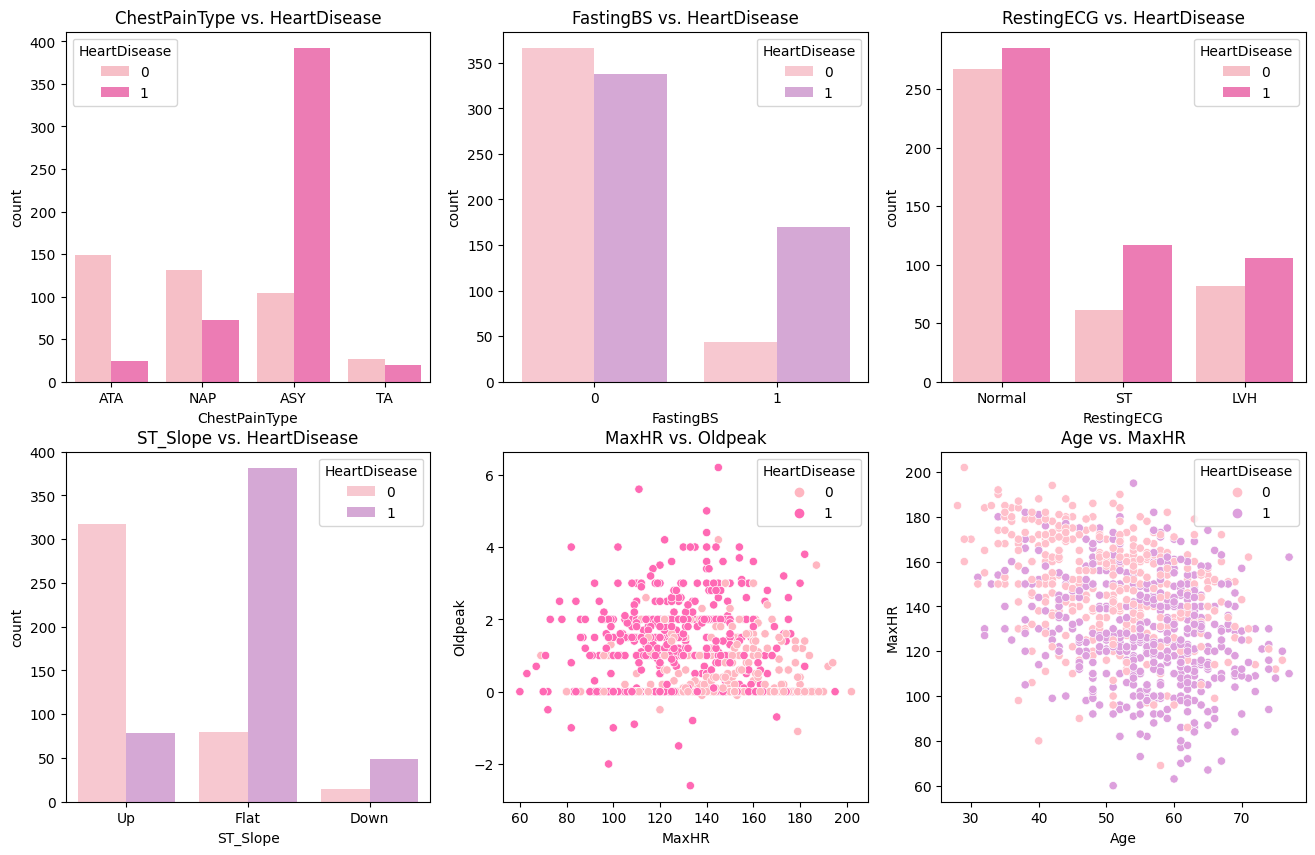

In [8]:
n_cols = 3 
n_rows = math.ceil(6 / n_cols)  # Adjust for the total number of plots

plt.figure(figsize=(16, 10))

plt.subplot(n_rows, n_cols, 1)
sns.countplot(x="ChestPainType", hue="HeartDisease", data=data, palette=palette_1)
plt.title("ChestPainType vs. HeartDisease")

plt.subplot(n_rows, n_cols, 2)
sns.countplot(x="FastingBS", hue="HeartDisease", data=data, palette=palette_2)
plt.title("FastingBS vs. HeartDisease")

plt.subplot(n_rows, n_cols, 3)
sns.countplot(x="RestingECG", hue="HeartDisease", data=data, palette=palette_1)
plt.title("RestingECG vs. HeartDisease")

plt.subplot(n_rows, n_cols, 4)
sns.countplot(x="ST_Slope", hue="HeartDisease", data=data, palette=palette_2)
plt.title("ST_Slope vs. HeartDisease")

plt.subplot(n_rows, n_cols, 5)
sns.scatterplot(x="MaxHR", y="Oldpeak", data=data, hue="HeartDisease", palette=palette_1)
plt.title("MaxHR vs. Oldpeak")

plt.subplot(n_rows, n_cols, 6)
sns.scatterplot(x="Age", y="MaxHR", data=data, hue="HeartDisease", palette=palette_2)
plt.title("Age vs. MaxHR")

plt.show()

___
### <font color="#d66dac">Observations:</font>
* <font color="#e6d1e5">Most patients who have Heart Disease experience Asymptomatic Chest Pain</font>
* <font color="#e6d1e5">Pateints whom Diabetic or Prediabetic and have Heart Disease are almost triple the patients whom diabetic or prediabtec with no Heart Disease. And patients with normal Blood Sugar have almost an equal probabilty of having Heart Disease.</font>
* <font color="#e6d1e5">Patients who experince (ST) or (LVH) are more prone to Heart Failure.</font>
* <font color="#e6d1e5">ST_Slope vs. HeartDisease shows very sensibal information, People with Upward ST_slope tend to be healthy, while Flat or Downward ST_Slope suggests Heart Disease</font>
* <font color="#e6d1e5">MaxHR vs. Oldpeak shows that most patients with above 0 Oldpeak have Heart Disease, while patients with near 0 or 0 have normal Heart function, even some negative outliers due to not having enough data shows that patients with Oldpeak less then 0 are also not healthy.</font>
* <font color="#e6d1e5">MaxHr drops with age, which cause a higher possibillity for Heart Failure.</font>
___

<a id="1"></a>
# <p style="background-color:#d66dac;font-family:georgia,serif;color:#FFF8ED;font-size:120%;text-align:center;border-radius:10px 10px;">Preprocessing</p>

### <font color="#d66dac">To do:</font>
* <font color="#e6d1e5">Use LabelEncoder to encode cateorical binary features.</font>
* <font color="#e6d1e5">Use One-Hot Encoder to encode to create binary columns for each multi-class category in a non-ordinal variable.</font>
* <font color="#e6d1e5">Use StandardScaler to scale features.</font>
* <font color="#e6d1e5">Splitting into train and test.</font>
* <font color="#e6d1e5">Applying transformation after splitting to avoid Data Leakage.</font>
___

In [9]:
X = data.drop("HeartDisease", axis=1)
y = data["HeartDisease"]

categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

# define encoders and scaler
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
scaler = StandardScaler()

#function to apply LabelEncoder for binary columns
def label_encode_binary(df, cols):
    for col in cols:
        df[col] = label_encoder.fit_transform(df[col])
    return df

binary_columns = ["FastingBS", "Sex", "ExerciseAngina"]
X[binary_columns] = label_encode_binary(X[binary_columns], binary_columns)

#ColumnTransformer for OneHotEncoder on multi-class features (nominal)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_cols),  # Scale numerical columns
        ('cat', one_hot_encoder, categorical_cols)  # One-Hot Encoding to categorical columns
    ])

In [10]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

<a id="1"></a>
# <p style="background-color:#d66dac;font-family:georgia,serif;color:#FFF8ED;font-size:120%;text-align:center;border-radius:10px 10px;">Model Training, Prediction & Evaluation</p>

___

### <font color="#d66dac">Models:</font>
* <font color="#e6d1e5">Logistic Regression.</font>
* <font color="#e6d1e5">Random Forest Classifier.</font>
* <font color="#e6d1e5">Support Vector Machine (SVM).</font>
___

In [11]:
# Logistic Regression
LR= LogisticRegression()

# Train
LR.fit(X_train_transformed, y_train)

# predictions
y_pred_LR = LR.predict(X_test_transformed)

# Evaluate 
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_LR))
print(classification_report(y_test, y_pred_LR))

Logistic Regression Accuracy:  0.8532608695652174
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



In [12]:
# Randoom Forest Classifier
RF = RandomForestClassifier(n_estimators=100, random_state=42)

# Train
RF.fit(X_train_transformed, y_train)

#predictions
y_pred_RF = RF.predict(X_test_transformed)

# Evaluate
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_RF))
print(classification_report(y_test, y_pred_RF))

Random Forest Accuracy:  0.875
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



In [13]:
# Supported Vector Machine
SVM = SVC(kernel='linear', random_state=42)

# Train
SVM.fit(X_train_transformed, y_train)

#  predictions
y_pred_SVM = SVM.predict(X_test_transformed)

# Evaluate the model
print("SVM Accuracy: ", accuracy_score(y_test, y_pred_SVM))
print(classification_report(y_test, y_pred_SVM))

SVM Accuracy:  0.8532608695652174
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



### <font color="#d66dac">Plotting Model performance</font>
#### <font color="#d66dac">First: Model Accuracy</font>

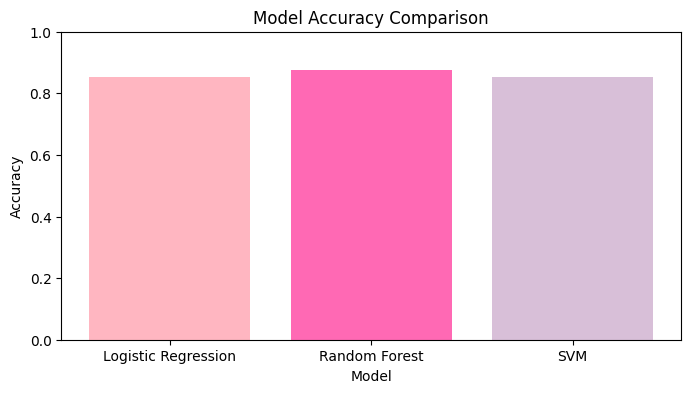

In [14]:
accuracy_scores = {
    'Logistic Regression': accuracy_score(y_test, y_pred_LR),
    'Random Forest': accuracy_score(y_test, y_pred_RF),
    'SVM': accuracy_score(y_test, y_pred_SVM)
}

plt.figure(figsize=(8, 4))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=["lightpink", "hotpink", "thistle"])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()

#### <font color="#d66dac">Second: Confusion Matrix</font>

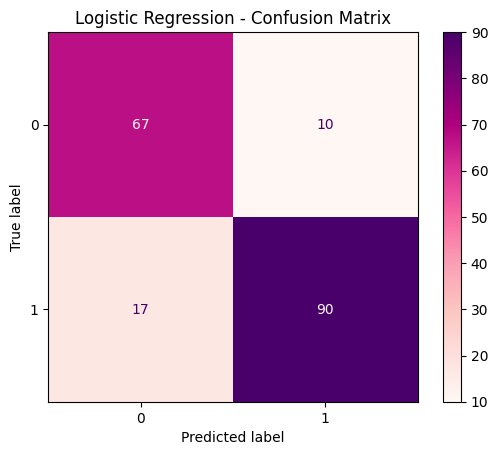

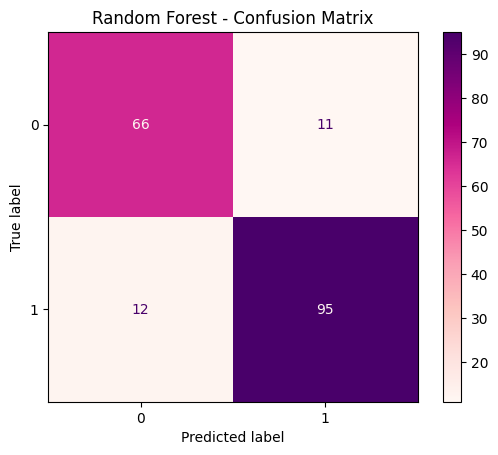

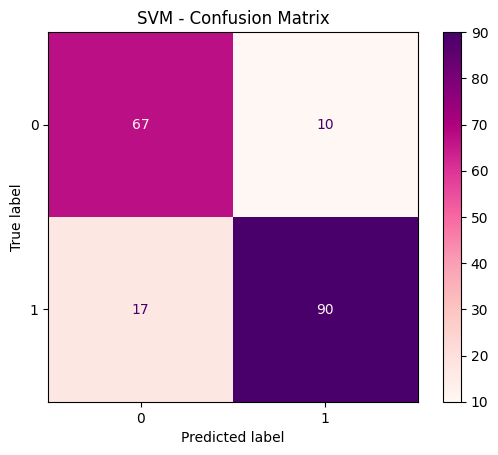

In [15]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='RdPu')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred_LR, 'Logistic Regression')
plot_confusion_matrix(y_test, y_pred_RF, 'Random Forest')
plot_confusion_matrix(y_test, y_pred_SVM, 'SVM')

<a id="1"></a>
# <p style="background-color:#d66dac;font-family:georgia,serif;color:#FFF8ED;font-size:160%;text-align:center;border-radius:10px 10px;">Conclusion</p>

___

## <font color="#d66dac">About the Models:</font>
##### <font color="#e6d1e5">Apparently Random Forest Classifier performs slightly better than other models with an accuracy score of 0.87.</font>
___
## <font color="#d66dac">About the Objectives:</font>
##### <font color="#e6d1e5">We successfully found what contributes the most to casuing Heart Failure, some being Fasting Blood Sugar, Age, Maximum Heart Rate, and what's mentioned in the observations.</font>
##### <font color="#e6d1e5">We were successfully able to define the characteristics of patients with Heart Disease using Exploratory Data Analysis.</font>
##### <font color="#e6d1e5">We were successfully able to predict Heart Failure using the available Data and features.</font>
___

<a id="1"></a>
# <p style="background-color:#d66dac;font-family:georgia,serif;color:#FFF8ED;font-size:160%;text-align:center;border-radius:10px 10px;">Please Upvote if you liked this work! <br> Feedback is Appreciated <br> Thank you!</p>